In [1]:
import stumpy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import argrelextrema
from datetime import timedelta

In [92]:
data = pd.read_csv('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/17-18/sleepPD.csv')
data['t'] = pd.to_datetime(data['t'])
data.head()

,t,x,y,z,classification,arm_angle,change
0,2021-03-17 22:30:00.026,0.352,0.896,-0.064,Sleep,-3.803555,3.260280
1,2021-03-17 22:30:00.056,0.320,1.024,0.000,Sleep,0.000000,3.803555
2,2021-03-17 22:30:00.096,0.288,0.928,0.064,Sleep,3.768429,3.768429
3,2021-03-17 22:30:00.126,0.256,0.864,0.128,Sleep,8.084449,4.316020
4,2021-03-17 22:30:00.166,0.288,0.800,0.160,Sleep,10.657149,2.572701


In [93]:
data1 = data[data.classification != 'Wake']
data1 = data1.reset_index(drop=True)
data1.head()

,t,x,y,z,classification,arm_angle,change
0,2021-03-17 22:30:00.026,0.352,0.896,-0.064,Sleep,-3.803555,3.260280
1,2021-03-17 22:30:00.056,0.320,1.024,0.000,Sleep,0.000000,3.803555
2,2021-03-17 22:30:00.096,0.288,0.928,0.064,Sleep,3.768429,3.768429
3,2021-03-17 22:30:00.126,0.256,0.864,0.128,Sleep,8.084449,4.316020
4,2021-03-17 22:30:00.166,0.288,0.800,0.160,Sleep,10.657149,2.572701


In [94]:
m = 22500
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps['arm_angle'] = sp.gpu_stump(data1['arm_angle'], m)
mps_list = mps['arm_angle'][:, 0].tolist()
mps_array = np.array(mps_list)
mps_round = np.around(mps_array, 4)

In [95]:
n = 22500  # number of points to be checked before and after

# Find local peaks
df = pd.DataFrame(mps_round, columns=['data'])
df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal,
                    order=n)[0]]['data']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal,
                    order=n)[0]]['data']

In [96]:
def sleep_interuptions(df):
    sleep_interuptions = []
    for i in range(len(df)-1):
        if (df['t'].iloc[i+1] - df['t'].iloc[i]) > timedelta(minutes=5):
            sleep_interuptions.append(i)
        else:
            pass
    return sleep_interuptions

sleep_interuptions = sleep_interuptions(data1)
print(sleep_interuptions)

[3879, 87507, 366219, 381703, 397187, 412671, 443639, 459123]


In [97]:
discords_df = df['max'].dropna()
discords_df = discords_df.reset_index()
discords_df = discords_df.sort_values(by=['max'])
discords_df

,index,max
0,13236,149.3440
5,229586,172.3307
1,65473,175.9893
8,421143,181.2100
7,338909,201.2344
2,115810,201.6853
6,262519,202.1564
3,140404,204.1087
4,140405,204.1087
9,463680,208.1733


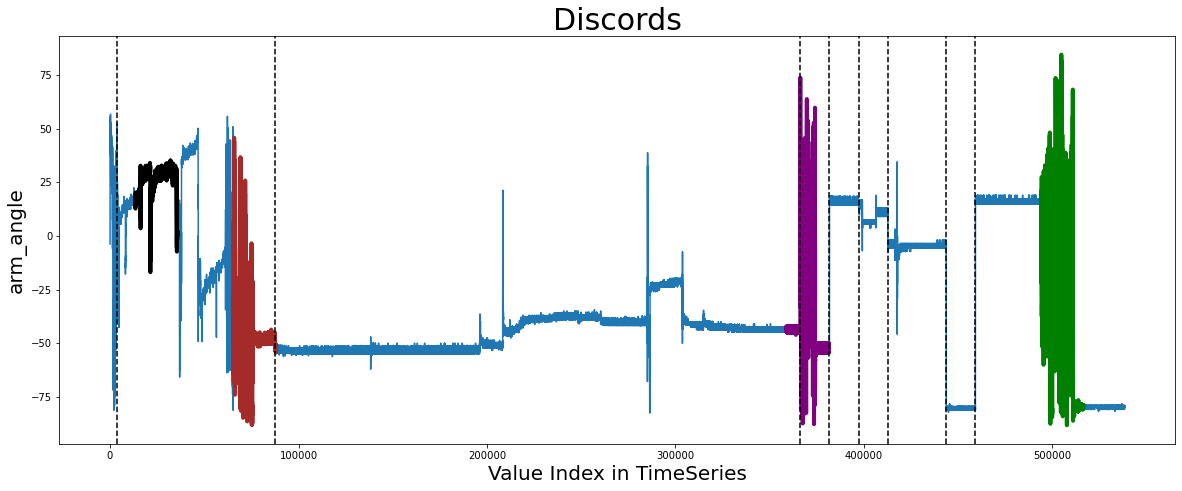

In [107]:
fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20, 7.5))

axs.set_ylabel('arm_angle', fontsize='20')
axs.plot(data1['arm_angle'])
axs.set_xlabel('Value Index in TimeSeries', fontsize ='20')

axs.plot(data1['arm_angle'].iloc[494139:494139+m], c='green', linewidth=4)
axs.plot(data1['arm_angle'].iloc[358909:358909+m], c='purple', linewidth=4)
axs.plot(data1['arm_angle'].iloc[65473:65473+m], c='brown', linewidth=4)
axs.plot(data1['arm_angle'].iloc[13236:13236+m], c='black', linewidth=4)
plt.title('Discords', fontsize='30')
for idx in sleep_interuptions:
    axs.axvline(x=idx, linestyle="dashed", c='black')
plt.savefig('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/17-18/PD_MP/discords_25Hz')

In [109]:
discord_num = 4

discord_green = data1['arm_angle'].iloc[494139:494139+m]
discord_purp = data1['arm_angle'].iloc[358909:358909+m]
discord_brown = data1['arm_angle'].iloc[65473:65473+m]
discord_black = data1['arm_angle'].iloc[13236:13236+m]

discors_green_std = discord_green.std()
discors_purp_std = discord_purp.std()
discors_brown_std = discord_brown.std()
discors_black_std = discord_black.std()

discors_green_range = max(discord_green) - min(discord_green)
discors_purp_range = max(discord_purp) - min(discord_purp)
discors_brown_range = max(discord_brown) - min(discord_brown)
discors_black_range = max(discord_black) - min(discord_black)

In [110]:
d1 = {'No. Discords': [discord_num], 'discors_green_std': [discors_green_std], 'discors_purp_std': [discors_purp_std],
      'discors_brown_std': [discors_brown_std], 'discors_black_std': [discors_black_std], 
      'discors_green_range': [discors_green_range], 'discors_purp_range': [discors_purp_range], 
      'discors_brown_range': [discors_brown_range], 'discors_black_range': [discors_black_range]}
df2 = pd.DataFrame(data=d1)
df2

,No. Discords,discors_green_std,discors_purp_std,discors_brown_std,discors_black_std,discors_green_range,discors_purp_range,discors_brown_range,discors_black_range
0,4,36.769737,22.045619,11.272881,6.368088,172.657225,161.40259,133.883174,52.038661


In [111]:
df2.to_csv('C:/Users/ale/Documents/Tec/PD sensor extracted data/main_sleep/17-18/sleepPD_discord_stats.csv', index = False)